In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [ ]:
def aitchison_distance(x, y):
    """ Compute the Aitchison distance between two vectors in simplex space.
    """
    lx = np.log(x)
    ly = np.log(y)
    lgx = np.mean(lx, axis=-1)
    lgy = np.mean(ly, axis=-1)
    diff = (lx - lgx) - (ly - lgy)
    return np.sqrt(np.sum(diff*diff))

In [2]:
def anorm(x, y, z):
    lx = np.log(np.array([x, y, z]))
    lgx = np.mean(lx)
    diff = lx - lgx
    return np.sqrt(np.sum(diff * diff))

In [3]:
def anorm2(x, y, z):
    lx = np.log(np.array([x, y, z]))
    return 2 * (lx[0]*(lx[0] - lx[1]) + lx[1]*(lx[1] - lx[2]) + lx[2]*(lx[2] - lx[0]))/3

***

In [ ]:
x = np.linspace(0, 1, 1000)
y = 1 - x
xx, yy = np.meshgrid(x, y)
z = 1 - xx - yy

In [4]:
x = np.linspace(0, 1, 100)
xx, yy, zz = np.meshgrid(x, x, x)

In [ ]:
z[np.where(z < 0)] = np.NAN

In [5]:
vanorm = np.vectorize(anorm)
norms = vanorm(xx, yy, zz)
norms.shape

/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract


(100, 100, 100)

In [6]:
vanorm2 = np.vectorize(anorm2)
norms2 = vanorm2(xx, yy, zz)
norms2.shape

/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


(100, 100, 100)

In [7]:
xyzi = np.where(np.isclose(norms, 1, atol=0.001))
xyzi2 = np.where(np.isclose(norms, 3, atol=0.001))
xyzi3 = np.where(np.isclose(norms2, 1, atol=0.001))
xyzi4 = np.where(np.isclose(norms2, 3, atol=0.001))
len(xyzi3)

3

In [ ]:
zz.shape

In [ ]:
np.all(xyzi2[0] == xyzi4[0])
np.all(xyzi2[1] == xyzi4[1])

<IPython.core.display.Javascript object>


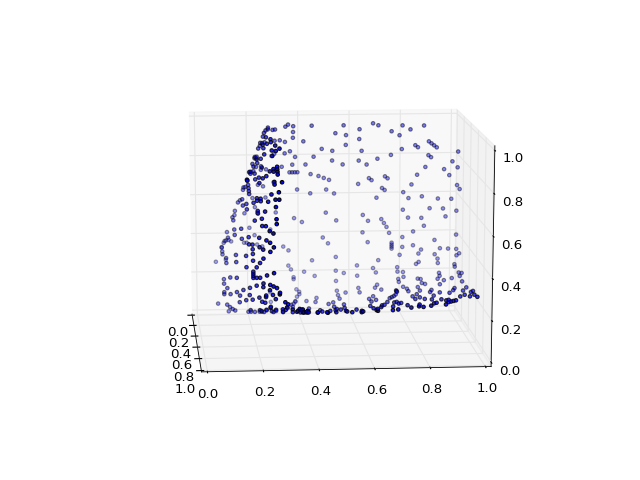

(0, 1)

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot_wireframe(xx, yy, zz, cmap=plt.cm.Blues, rstride=500, cstride=500)
# ax.scatter3D(xx[xyzi], yy[xyzi], z[xyzi], c='r')
# ax.scatter3D(xx[xyzi2], yy[xyzi2], z[xyzi2], c='g')
ax.scatter3D(xx[xyzi3], yy[xyzi3], zz[xyzi3], c='b', s=10)
# ax.scatter3D(xx[xyzi4], yy[xyzi4], zz[xyzi4], c='r')
ax.set_zlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

In [ ]:
def dd(lx):
    return 2 * (lx[0]*(lx[0] - lx[1]) + lx[1]*(lx[1] - lx[2]) + lx[2]*(lx[2] - lx[0]))/3

In [ ]:
a = np.array([1/8, 1/8, 3/4])
O = np.array([1/3, 1/3, 1/3])

In [ ]:
aitchison_distance(a, O)

In [ ]:
anorm(a[0], a[1], a[2])

In [ ]:
lx = np.log(a)

In [ ]:
2 * (np.sum(lx * lx) - (lx[0] * lx[1]) - (lx[1] * lx[2]) - (lx[2] * lx[0])) / 3

In [ ]:
dd(lx) / aitchison_distance(a, O)